<a href="https://colab.research.google.com/github/yustiks/statistics_in_python/blob/master/statistics_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Центральная предельная теорема. 

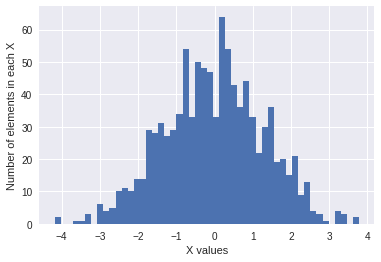

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
number_of_sums = 1000
number_of_randoms = 10
X1 = np.zeros((number_of_sums, 1))
for i in range(number_of_sums):
  X1[i,0] = np.sum(np.random.rand(number_of_randoms,1)) - np.sum(np.random.rand(number_of_randoms,1))
plt.hist(X1, 50)
plt.xlabel('X values')
plt.ylabel('Number of elements in each X')
plt.show()

# Матрица ковариаций

Декомпозиция матрицы ковариаций на собственные вектора и собственные числа

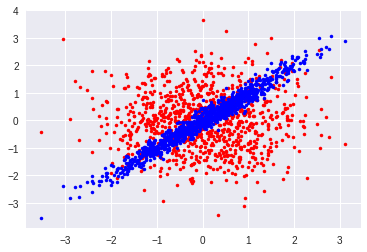

In [0]:
import numpy.linalg as la
n = 1000
C = [[1,0.98],[0.98,1]]
A = la.cholesky(C)
X = np.random.randn(n,2)
Y = np.dot(A,X.T)

plt.plot(X[:,0], X[:,1], 'r.')
plt.plot(Y[0,:], Y[1,:], 'b.')

# Чистые данные

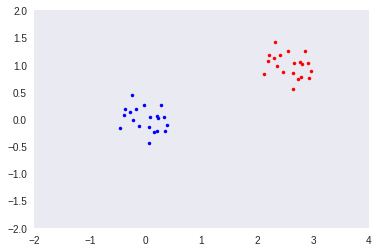

In [3]:
def mean_centering(X):
    mu = np.mean(X, axis=0)
    return X- np.ones((X.shape[0],2))*mu
n=20
mu = [2.5, 1]
mu_add = np.ones((n,2))*mu
Xa = np.random.randn(n,2)*0.25
Xa = Xa + mu_add
Ya = mean_centering(Xa)

plt.plot(Xa[:,0], Xa[:,1], 'r.')
plt.plot(Ya[:,0], Ya[:,1], 'b.')
plt.axis([-2,4,-2,2])
plt.grid()

# Поиск собственного вектора

1.7000000000000002 [0.70710678 0.70710678]


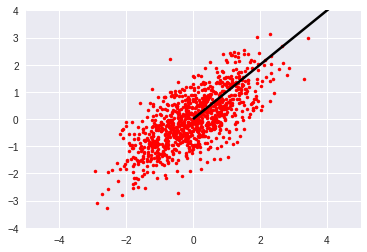

0.30000000000000016 [-0.70710678  0.70710678]


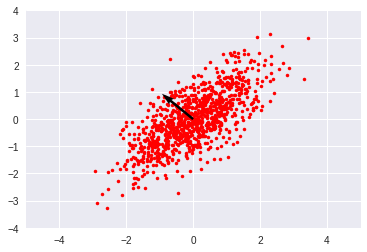

In [5]:
import numpy.linalg as la
n=1000
Cb = [[1,0.7],[0.7,1]]
Ab = la.cholesky(Cb)
Xb = np.random.randn(n,2)
Yb = np.dot(Ab,Xb.T)
w,v = la.eig(Cb)

for i in range(len(w)):
    
    plt.plot(Yb[0,:], Yb[1,:], 'r.', zorder=1)
    plt.axis([-5,5,-4,4])
    print(w[i], v[:,i])
    plt.quiver(0,0, v[:,i][0], v[:,i][1], angles = 'xy', scale=(2.5/w[i]), zorder=2)
    plt.show()

# Теория вероятности

In [0]:
#произвольно выбрать мальчика или девочку
def random_kid():
	return random.choice(["boy", "girl"])

#проверка парадокса мальчика и девочки
both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)
for _ in range(10000):	# провести эксперимент на совокупности
						# из 10000 семей
	younger = random_kid()
	older = random_kid()
	if older == "girl":							# старшая?
		older_girl += 1
	if older == "girl" and younger == "girl":	# обе?
		both_girls += 1
	if older == "girl" or younger == "girl":	# любая из двух?
		either_girl += 1
		
print("P(обе | старшая):", both_girls / older_girl)	# 0.514 ~ 1/2
print("P(обе | любая):", both_girls / either_girl)	# 0.342 ~ 1/3

						

P(обе | старшая): 0.5007089325501317
P(обе | любая): 0.3311897106109325
